## Homework #8

Note - the solution is actually not good enough

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd
from scipy import signal 
import warnings
warnings.filterwarnings("ignore")

### Earth's orbit - pacemaker of the Ice Ages

In Lecture 21 and the corresponding in-class practice, we have looked at the time series of insulation for three key parameters of the earth orbit: the _eccentricity_ (or ovalness of the orbit around the sun), the _obliquity_ (tilt) of the spin axis and the _precession_ of the spin axis.  You've also tried generate periodograms in order to find the characteristic frequencies for the three parameters - and found some interesting frequencies in the periodograms, they are also known as "modes".

But how do we relate these frequencies to the variations in ice ages?  Glaciers tend to over-ride the evidence of their older siblings, so how do we know the timing and extent of past glaciations?  The answer is marine fossils. Marine fossils, like formainifera, are made of calcium carbonate and retain a record of the oxygen isotopic ratios of the sea water in which they live.  And "So?", you say.  What does that have to do with ice volume?   Here is the answer in a nutshell: 
- There are several isotopes of oxygen, two of which are fairly common $^{18}$O and $^{16}$O.  
- During evaporation, the lighter isotope is preferentially removed, leaving the water body enriched in the heavier isotope.  When the water condenses, the process is reversed- the heavier isotope is preferentially removed- so nothing should happen over time, right?  What goes up must come down.  But it isn't so simple.  
- Evaporation occurs mostly in the tropics (due to the temperature) and then the clouds move north raining and snowing out as they go.  This process results in an enrichment of the light oxygen isotopes in the snow and an enrichment of the heavier isotope in the sea water. This process is Rayleigh distillation. The ratio of the two isotopes is a proxy of the volume of ice.  

We will need a measure of the isotopic ratios in foraminifera recovered from deep sea sediment cores and their DATES. The latter was done using magnetic stratigraphy (see, e.g., Shackleton and Opdyke, 1973, Quaternary Research, 3, 39-55, https://doi.org/10.1016/0033-5894(73)90052-5). A modern version of these data was published by Lisecki and Raymo (2005) called the LR04 stack.  This is a stack of 58 records of oxygen isotopic variations, several of which were independently dated using magnetostratigraphy, from all over the world's oceans. The data are cast as $\delta ^{18}O$, defined as: 

$$\delta ^{{18}}O={\Biggl (}{\frac  {{\bigl (}{\frac  {^{{18}}O}{^{{16}}O}}{\bigr )}_{{sample}}}{{\bigl (}{\frac  {^{{18}}O}{^{{16}}O}}{\bigr )}_{{standard}}}}-1{\Biggr )}*1000\ ^{{o}}\!/\!_{{oo}}$$

Let's consider only the last million years for the following analysis on the pace maker of the Earth's ice ages. Here we go:

- use the "INSOLN.LA2004.BTL.100.csv" data set you've played in in-class practice 17, find out the leading periodicities (modes) in _eccentricity_, _obliquity_ and _precession_ of the Earth's orbit
- use the "LR04stack.csv" data, plot the "d18O" column (which is calculated using the above equation) up for the last million years (Age<1000)
- use a moving average method to remove variations faster than 5 ka in the d18O data, plot the smoothed d18O in a new figure. What happened to the "d18O" data after the moving average? Why?
- generate a periodograms for the smoothed time series of d18O you've just created
- label the frequency modes in Eccentricity, Obliquity and Precession you've found in the periodogram of d18O using **verticle lines**. You need to adjust your figure scale and axis limit etc. in order to highlight the frequency components that are physically meaningful
- conclude you findings (this is 10% of the total grade).

In [10]:
isolin = pd.read_csv('INSOLN.LA2004.BTL.100.csv')
#isolin = isolin[isolin['Age (ka)']<1000]
isolin.tail(500)

,Age (ka),Eccentricity,Obliquity,Precession
100501,100501,0.018469,0.392362,0.935464
100502,100502,0.018152,0.391434,0.641745
100503,100503,0.017882,0.390852,0.348597
100504,100504,0.017515,0.390650,0.057196
100505,100505,0.017143,0.390851,6.050524
...,...,...,...,...
100996,100996,0.052631,0.406485,0.569041
100997,100997,0.052557,0.406847,0.266177
100998,100998,0.052436,0.407101,6.249016
100999,100999,0.052224,0.407243,5.947740


the peak freq in Eccentricity is [0.008]
the peak freq in Obliquity is [0.024]
the peak freq in Precession is [0.042]


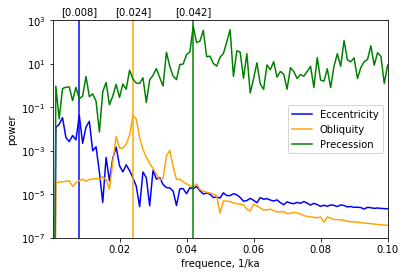

In [123]:
# find out the leading periodicities in Eccentricity, Obliquity and Precession
# I'm gonna use for-loops whenever I can
ob_list = ['Eccentricity', 'Obliquity', 'Precession']
col_list = ['blue','orange','green'] # color for each orbit type data
freq_dict = {} # create an empty dictionary to save the peak frequencies in each orbit

for ob,colr in zip(ob_list,col_list): # loop over orbit types, pay attention to the zip() function
    # generate a periodogram, you need y[n] and fs
    y = np.array(isolin[ob]) # data column
    fs = 1 # frequency is 1/ka 

    freqs,power=signal.periodogram(y,fs) # calculate periodogram
    plt.semilogy(freqs,power,label=ob,color = colr) # plot power specturm
    
    power_peak = power.max() # find the peak power in the periodogram
    freqs_peak = freqs[power==power.max()] # filter by the peak power -> corresponding to the peak frequency
    
    plt.axvline(x=freqs_peak,color=colr)  # use a vertical line to indicate the peak freqs in each perodogram
    plt.text(freqs_peak,1.5e3,str(np.round(freqs_peak,3)),ha='center',va='bottom') # annotate the line
    
    print('the peak freq in',ob,'is',freqs_peak)
    freq_dict[ob] = freqs_peak # store peak frequency in the dictionary using a key:value pair

plt.xlabel('frequence, 1/ka')
plt.ylabel('power')
plt.xlim([0.0001,0.1])
plt.ylim([1e-7,1e3])
plt.legend()
plt.show()

So the code above gave most of the frequency modes by detecting the maximum values in each periodogram. However, it seems like there's another peak frequency mode in Obliquity which is around 0.034, that was not picked by the frequency maximum. so let's add that information to the dictionary "freq_dict" manually:

In [141]:
freq_dict_new = {'Eccentricity':0.008, 'Obliquity(1)':0.024, 'Obliquity(2)':0.034,'Precession':0.042}
col_list_new = ['blue','orange','orange','green'] # color for each orbit type data
ob_list_new = freq_dict_new.keys()

dict_keys(['Eccentricity', 'Obliquity(1)', 'Obliquity(2)', 'Precession'])


Index(['Age (ka)', 'd18O', 'uncertainty'], dtype='object')


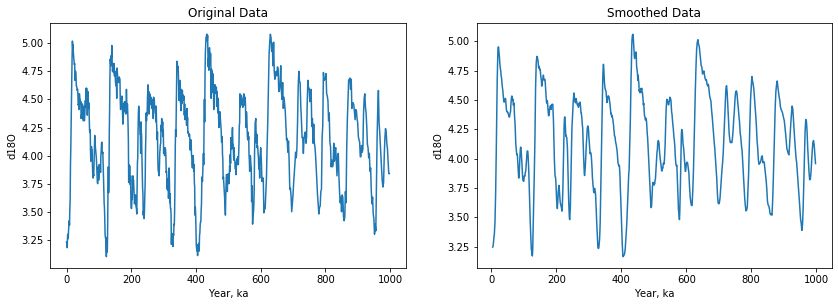

In [125]:
d18O=pd.read_csv('../Datasets/LR04stack.csv')
print (d18O.columns)

d18O_1Ma=d18O[d18O['Age (ka)']<1000] # filter data for last 1Ma
d18O_1Ma['d18O_smooth']=d18O_1Ma['d18O'].rolling(5).mean()

plt.figure(figsize=(14,4.5))
plt.subplot(1,2,1)
plt.plot(d18O_1Ma['Age (ka)'],d18O_1Ma['d18O'])
plt.xlabel('Year, ka'),plt.ylabel('d18O')
plt.title('Original Data')
plt.subplot(1,2,2)
plt.plot(d18O_1Ma['Age (ka)'],d18O_1Ma['d18O_smooth'])
plt.xlabel('Year, ka'),plt.ylabel('d18O')
plt.title('Smoothed Data')
plt.show()

It is quite clear in the smoothed data, any variations with periodicities less than 5ka is averaged out by the rolling(5).mean() function

Now let's generate a periodogram for the $\delta^{18}O$ data

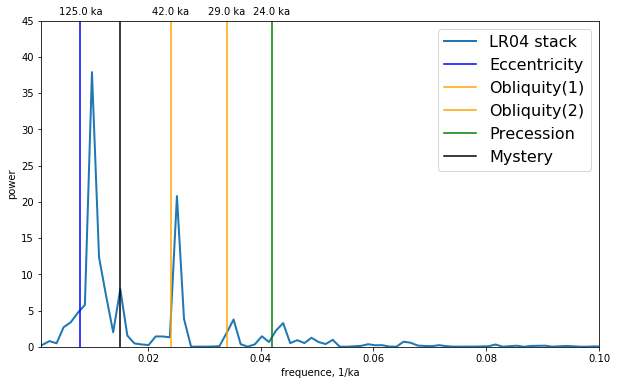

In [159]:
iso=np.array(d18O_1Ma['d18O_smooth'].dropna().values) # pick out the data series
fs = 1 # fs = 1 ka^(-1)
iso_freqs,iso_power=signal.periodogram(iso,fs) # generate a periodogram

plt.figure(figsize=(10,6))
plt.plot(iso_freqs,iso_power,label='LR04 stack',linewidth=2)
plt.xlim(.001,.1)
plt.ylim([0,45])

# now label the leading frequencies in the orbital data on top of the d18O periodogram
# so there's another frequency mode in Obliquity which is around 0.034, let's add that to the results
freq_dict_new = {'Eccentricity':0.008, 'Obliquity(1)':0.024, 'Obliquity(2)':0.034,'Precession':0.042}
col_list_new = ['blue','orange','orange','green'] # color for each orbit type data

for ob,colr in zip(freq_dict_new.keys(),col_list_new): # loop over orbit types, pay attention to the zip() function
    
    freqs_peak = freq_dict_new[ob]
    plt.axvline(x=freqs_peak,color=colr,label=ob)  # use a vertical line to indicate the peak freqs in each perodogram
    plt.text(freqs_peak,45.5,str(np.round(1/freqs_peak))+' ka',ha='center',va='bottom') # annotate the line

# it seems like there's a frequency component near 0.018 that is not captured by the orbital data, let's add that
plt.axvline(x=0.015,color='k',label='Mystery')  # use a vertical line to indicate the peak freqs in each perodogram

plt.legend(fontsize=16)
plt.xlabel('frequence, 1/ka')
plt.ylabel('power')
plt.show()

Interpretations? - try this one https://www.nature.com/articles/540208a !